In [1]:
import pandas as pd
import numpy as np

ds= pd.read_csv('dataset.csv',delimiter=';')
ds

,Görüş,Durum
0,Berbat bir fırın turbo var güya fan dönmüyor t...,1
1,ürünü henüz deneme fırsatım olmadı memnun olac...,0
2,Teşekkürler zamanında eksiksiz teslimat 💪🏻💪🏻💪🏻,2
3,Beklentilerimi karşılamadı. Yeterince hızlı değil,1
4,Gayet iyi Fiyat ve kalite dengesi oldukça iyi,2
...,...,...
15248,Ürün beklentimi karşıladı,2
15249,Makine elime ulaştı çok güzel kesiyor,2
15250,Sakalları ince alıyor.,2
15251,Babama aldım çok memnun kaldı,2


In [2]:
ds.describe()

,Durum
count,15253.000000
mean,1.364518
std,0.637642
min,0.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2.000000


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15253 entries, 0 to 15252
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Görüş   15253 non-null  object
 1   Durum   15253 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 238.5+ KB


In [4]:
ds.isnull().sum()

Görüş    0
Durum    0
dtype: int64

In [5]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
olumlu=ds[ds['Durum']== 2].Görüş
notr=ds[ds['Durum']== 0].Görüş
olumsuz=ds[ds['Durum']==1].Görüş

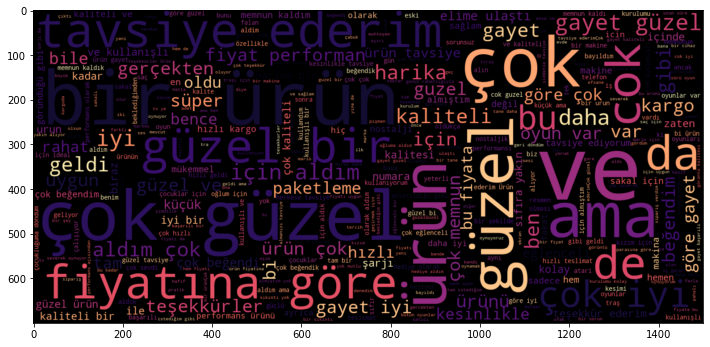

In [7]:
wordcloud_olumlu = WordCloud(width=1500, height=700,max_font_size=200,min_font_size=10,max_words=1000,colormap='magma').generate("".join(olumlu))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_olumlu, interpolation="bilinear")
plt.axis("on")
plt.show()

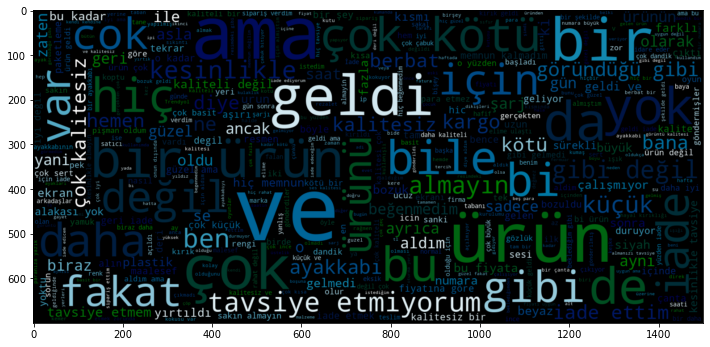

In [8]:
wordcloud_olumsuz = WordCloud(width=1500, height=700,max_font_size=200,min_font_size=10,max_words=1000,colormap='ocean_r').generate("".join(olumsuz))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud_olumsuz, interpolation="bilinear")
plt.axis("on")
plt.show()

In [9]:
ds.Durum.value_counts()

1    7025
2    6894
0    1334
Name: Durum, dtype: int64

<AxesSubplot:ylabel='Durum'>

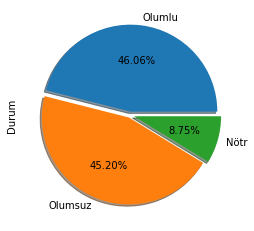

In [10]:
ds.Durum.value_counts().plot(kind='pie',shadow = True,labels=['Olumlu','Olumsuz','Nötr'],explode=[0.04,0.03,0.05], autopct='%1.2f%%')

Text(0, 0.5, 'Durum')

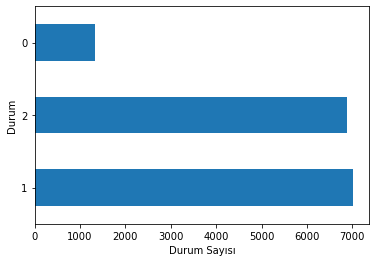

In [11]:
ds.Durum.value_counts().plot.barh()
plt.xlabel("Durum Sayısı")
plt.ylabel("Durum")

In [12]:
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
from nltk.corpus import stopwords 
import nltk
print(stopwords.words('turkish'))

['acaba', 'ama', 'aslında', 'az', 'bazı', 'belki', 'biri', 'birkaç', 'birşey', 'biz', 'bu', 'çok', 'çünkü', 'da', 'daha', 'de', 'defa', 'diye', 'eğer', 'en', 'gibi', 'hem', 'hep', 'hepsi', 'her', 'hiç', 'için', 'ile', 'ise', 'kez', 'ki', 'kim', 'mı', 'mu', 'mü', 'nasıl', 'ne', 'neden', 'nerde', 'nerede', 'nereye', 'niçin', 'niye', 'o', 'sanki', 'şey', 'siz', 'şu', 'tüm', 've', 'veya', 'ya', 'yani']


In [14]:
def delete_stopwords(metin):
    metin = ' '.join([word for word in metin.split() if word not in (stopwords.words('turkish'))])
    return metin
ds['son_Görüş'] = ds['Görüş']
ds['son_Görüş'] = ds['son_Görüş'].apply(lambda x : delete_stopwords(x))

ds.head(8)

,Görüş,Durum,son_Görüş
0,Berbat bir fırın turbo var güya fan dönmüyor t...,1,Berbat bir fırın turbo var güya fan dönmüyor t...
1,ürünü henüz deneme fırsatım olmadı memnun olac...,0,ürünü henüz deneme fırsatım olmadı memnun olac...
2,Teşekkürler zamanında eksiksiz teslimat 💪🏻💪🏻💪🏻,2,Teşekkürler zamanında eksiksiz teslimat 💪🏻💪🏻💪🏻
3,Beklentilerimi karşılamadı. Yeterince hızlı değil,1,Beklentilerimi karşılamadı. Yeterince hızlı değil
4,Gayet iyi Fiyat ve kalite dengesi oldukça iyi,2,Gayet iyi Fiyat kalite dengesi oldukça iyi
5,"Çok kalitesiz. Bir ay normal çalıştı, sonra ya...",1,"Çok kalitesiz. Bir ay normal çalıştı, sonra ya..."
6,Dart rekabetinde fiyat/kalite endeksinde başar...,2,Dart rekabetinde fiyat/kalite endeksinde başar...
7,"Ürün çalışıyor şimdilik, fena değil.",0,"Ürün çalışıyor şimdilik, fena değil."


In [15]:
import string
def remove_punct(metin):
    table = str.maketrans('', '', string.punctuation)
    return metin.translate(table)
ds['son_Görüş'] = ds['son_Görüş'].apply(lambda x : remove_punct(x))
ds['son_Görüş'] = ds['son_Görüş'].apply(lambda x : x.lower())
ds['son_Görüş']

0        berbat bir fırın turbo var güya fan dönmüyor t...
1        ürünü henüz deneme fırsatım olmadı memnun olac...
2           teşekkürler zamanında eksiksiz teslimat 💪🏻💪🏻💪🏻
3         beklentilerimi karşılamadı yeterince hızlı değil
4               gayet iyi fiyat kalite dengesi oldukça iyi
                               ...                        
15248                            ürün beklentimi karşıladı
15249                    makine elime ulaştı güzel kesiyor
15250                                sakalları ince alıyor
15251                            babama aldım memnun kaldı
15252                          iki tane aldım harika ürün…
Name: son_Görüş, Length: 15253, dtype: object

In [16]:
import re
def delete_emoji(metin):
    emoji_pattern = re.compile("[" 
                               u"\U0001F600-\U0001F64F"  # emoticons 
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs 
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols 
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS) 
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', metin)
ds['son_Görüş'] = ds['son_Görüş']
ds['son_Görüş'] = ds['son_Görüş'].apply(lambda x : delete_emoji(x))
ds['son_Görüş']

0        berbat bir fırın turbo var güya fan dönmüyor t...
1        ürünü henüz deneme fırsatım olmadı memnun olac...
2                 teşekkürler zamanında eksiksiz teslimat 
3         beklentilerimi karşılamadı yeterince hızlı değil
4               gayet iyi fiyat kalite dengesi oldukça iyi
                               ...                        
15248                            ürün beklentimi karşıladı
15249                    makine elime ulaştı güzel kesiyor
15250                                sakalları ince alıyor
15251                            babama aldım memnun kaldı
15252                          iki tane aldım harika ürün…
Name: son_Görüş, Length: 15253, dtype: object

In [17]:
def remove_urls(metin):
    url_pattern = re.compile(r'http\S+')
    return url_pattern.sub(r'', metin)
ds['son_Görüş'] = ds['son_Görüş'].apply(lambda x : remove_urls(x))
ds['son_Görüş']

0        berbat bir fırın turbo var güya fan dönmüyor t...
1        ürünü henüz deneme fırsatım olmadı memnun olac...
2                 teşekkürler zamanında eksiksiz teslimat 
3         beklentilerimi karşılamadı yeterince hızlı değil
4               gayet iyi fiyat kalite dengesi oldukça iyi
                               ...                        
15248                            ürün beklentimi karşıladı
15249                    makine elime ulaştı güzel kesiyor
15250                                sakalları ince alıyor
15251                            babama aldım memnun kaldı
15252                          iki tane aldım harika ürün…
Name: son_Görüş, Length: 15253, dtype: object

In [18]:
ds.head(13)

,Görüş,Durum,son_Görüş
0,Berbat bir fırın turbo var güya fan dönmüyor t...,1,berbat bir fırın turbo var güya fan dönmüyor t...
1,ürünü henüz deneme fırsatım olmadı memnun olac...,0,ürünü henüz deneme fırsatım olmadı memnun olac...
2,Teşekkürler zamanında eksiksiz teslimat 💪🏻💪🏻💪🏻,2,teşekkürler zamanında eksiksiz teslimat
3,Beklentilerimi karşılamadı. Yeterince hızlı değil,1,beklentilerimi karşılamadı yeterince hızlı değil
4,Gayet iyi Fiyat ve kalite dengesi oldukça iyi,2,gayet iyi fiyat kalite dengesi oldukça iyi
5,"Çok kalitesiz. Bir ay normal çalıştı, sonra ya...",1,çok kalitesiz bir ay normal çalıştı sonra yandı
6,Dart rekabetinde fiyat/kalite endeksinde başar...,2,dart rekabetinde fiyatkalite endeksinde başarı...
7,"Ürün çalışıyor şimdilik, fena değil.",0,ürün çalışıyor şimdilik fena değil
8,ÇOK BAŞARILI ÜRÜN GAYET BAŞARILI HIZLI KARGO,2,çok başarili ürün gayet başarili hizli kargo
9,Takdir etmek gerekir. Ürün gayet güzel ve kull...,2,takdir etmek gerekir ürün gayet güzel kullanım...


In [19]:
ds=ds.drop(["Görüş"], axis=1)
ds = ds[['son_Görüş','Durum']]
ds

,son_Görüş,Durum
0,berbat bir fırın turbo var güya fan dönmüyor t...,1
1,ürünü henüz deneme fırsatım olmadı memnun olac...,0
2,teşekkürler zamanında eksiksiz teslimat,2
3,beklentilerimi karşılamadı yeterince hızlı değil,1
4,gayet iyi fiyat kalite dengesi oldukça iyi,2
...,...,...
15248,ürün beklentimi karşıladı,2
15249,makine elime ulaştı güzel kesiyor,2
15250,sakalları ince alıyor,2
15251,babama aldım memnun kaldı,2


In [20]:
x = ds['son_Görüş']
y = ds['Durum']

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state = 42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2500)
x_train = vectorizer.fit_transform(x_train)
x_test = vectorizer.transform(x_test)

In [23]:
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 4)
KNN.fit(x_train, y_train)
y_pred = KNN.predict(x_test)
knn_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:','%',knn_score*100)

Accuracy Score: % 69.51486013986013


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred =  gbc.predict(x_test)
gbc_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:','%',gbc_score*100)

Accuracy Score: % 81.97115384615384


In [25]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(x_train,y_train)
y_pred =  random_forest_classifier.predict(x_test)
rf_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:','%',rf_score*100)

Accuracy Score: % 86.4729020979021


In [26]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)
nb_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:','%',nb_score*100)

Accuracy Score: % 87.32517482517483


In [27]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred =  xgb.predict(x_test)
xgb_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:','%',xgb_score*100)

[23:48:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: % 86.64772727272727


In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
lr_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:','%',lr_score*100)

Accuracy Score: % 88.00262237762237


In [29]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)
y_pred =  svm.predict(x_test)
svm_score=metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score:','%',svm_score*100)

Accuracy Score: % 90.2972027972028


In [30]:
table = [('K Neighbors Classifier', knn_score), ('Gradient Boosting Classifier',gbc_score ),('Random Forest Classifier',rf_score ), ('Multinomial NB',nb_score ),
         ('XGB Classifier',xgb_score ), ('Logistic Regression', lr_score),  ('SVM', svm_score)]

score_table =pd.DataFrame(data = table, columns=['Models', 'AccuracyScore'])
score_table

,Models,AccuracyScore
0,K Neighbors Classifier,0.695149
1,Gradient Boosting Classifier,0.819712
2,Random Forest Classifier,0.864729
3,Multinomial NB,0.873252
4,XGB Classifier,0.866477
5,Logistic Regression,0.880026
6,SVM,0.902972


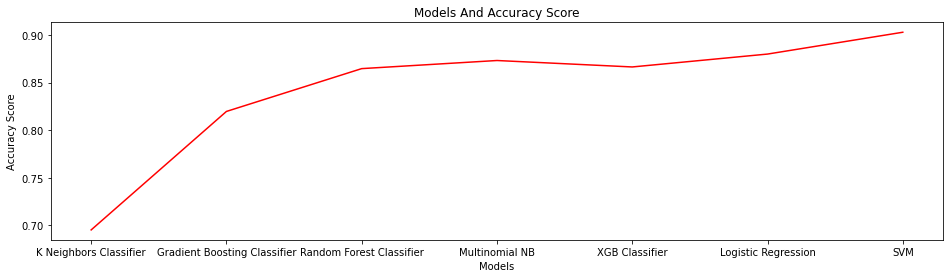

In [31]:
plt.figure(figsize=(16,4))
plt.plot(score_table.Models,score_table.AccuracyScore,color="red") 
plt.title("Models And Accuracy Score")
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.show()

In [32]:
import pickle
filename = 'best_model.sav'
pickle.dump(svm, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

In [33]:
pickle.dump(svm, open("model.pkl","wb"))

model = pickle.load(open("model.pkl","rb"))

In [ ]:
from tkinter import *

window = Tk()
window.title("Duygu Analizi")
window.geometry('500x300+500+300')
window.configure(background="Dark sea green3")
window.resizable(False, False)

text1= Label(window, text='DUYGU ANALİZİ YAP !', font='Times 20 italic', width=25, justify='center',fg="Violet Red")
text1.place(x=60, y=30)

entry = Entry(window, font='Times 18', width=30, justify='center')
entry.place(x=70, y=80)

text2= Label(window, text='', font='Times 20 bold', width=20, justify='center')
text2.place(x=80, y=200)

def sentiment_analysis():
    text=entry.get()
    text_transform = vectorizer.transform([text])
    model.predict(text_transform)
    result = ['POZİTİF 😄' if lbl == 2 else 'NEGATİF  🙁' for lbl in model.predict(text_transform)]
    text2.configure(text=result[0])

buton = Button(window, text='Analiz Yap', font='Courier 12', width=25, bg="Hot Pink3",command=sentiment_analysis)
buton.place(x=110, y=130)

window.mainloop()
